<a href="https://colab.research.google.com/github/Harshwardhanpatil-10/local/blob/main/Innobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("Amazon Sale Report.csv", encoding="latin1")
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [4]:
df['Qty'] = df['Qty'].fillna(0)
df['Amount'] = df['Amount'].fillna(0)


In [6]:
df['Date'].head(10)



,Date
0,2022-04-30
1,2022-04-30
2,2022-04-30
3,2022-04-30
4,2022-04-30
5,2022-04-30
6,2022-04-30
7,2022-04-30
8,2022-04-30
9,2022-04-30


In [8]:
df.drop_duplicates(inplace=True)


In [9]:
total_sales = df['Amount'].sum()
total_sales


np.float64(78496786.39000002)

In [10]:
total_orders = df['Order ID'].nunique()
total_orders


120229

In [11]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales


,Amount
Month,
2022-03,101683.85
2022-04,28742816.41
2022-05,26226476.75
2022-06,23425809.38


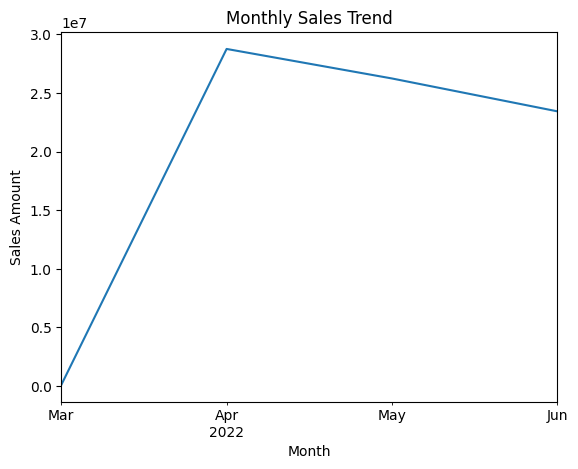

In [12]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.show()


In [13]:
df['Category'].value_counts()


,count
Category,
T-shirt,50219
Shirt,49804
Blazzer,15489
Trousers,10607
Perfume,1157
Wallet,926
Socks,439
Shoes,164
Watch,3


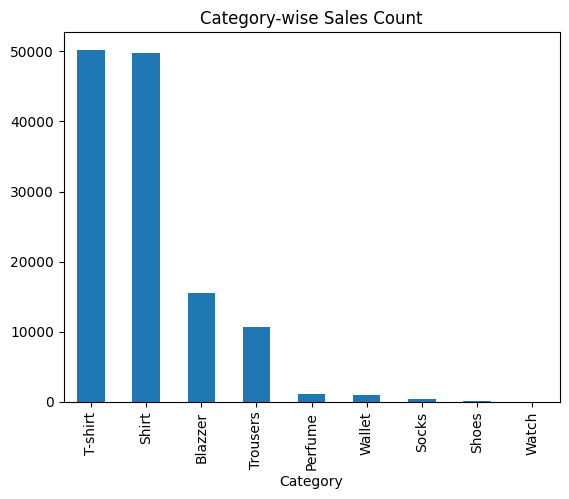

In [14]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Category-wise Sales Count")
plt.show()


In [15]:
df['Size'].value_counts()


,count
Size,
M,22350
L,21777
XL,20520
XXL,17783
S,16754
3XL,14626
XS,11033
Free,2250
6XL,738


In [16]:
df['Fulfilment'].value_counts()


,count
Fulfilment,
Amazon,89595
Merchant,39213


In [17]:
df.groupby('Fulfilment')['Amount'].sum()


,Amount
Fulfilment,
Amazon,54262165.00
Merchant,24234621.39


In [18]:
df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)


,Amount
ship-state,
MAHARASHTRA,13318966.38
KARNATAKA,10465387.03
TELANGANA,6909670.08
UTTAR PRADESH,6814126.08
TAMIL NADU,6510503.73
...,...
rajsthan,521.00
AR,493.00
Rajsthan,443.00


In [19]:
df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)


,Amount
ship-city,
BENGALURU,6836614.65
HYDERABAD,4941790.25
MUMBAI,3696704.04
NEW DELHI,3608277.78
CHENNAI,3098745.74
...,...
Chinnakodur,0.00
ARUMBAVUR,0.00
junagadh,0.00


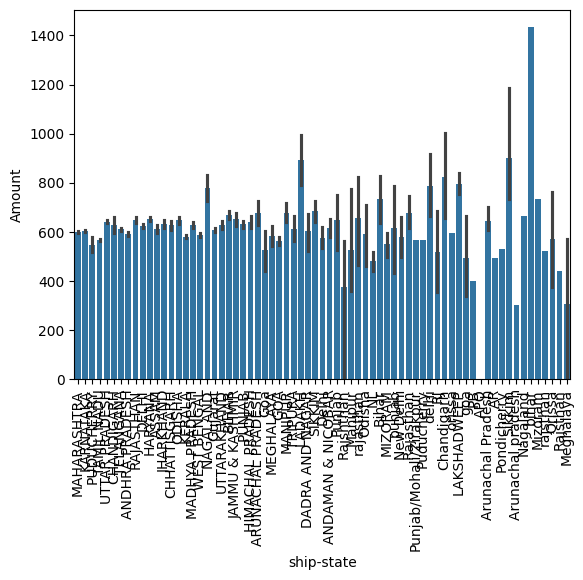

In [20]:
import seaborn as sns
sns.barplot(x="ship-state", y="Amount", data=df)
plt.xticks(rotation=90)
plt.show()
